# Linear Regression Example

In [1]:
# import sys
# sys.path.append('../../pyLearnAlgorithms')
import pandas as pd
import numpy as np
import os
from pyLearnAlgorithms.graph_view import GraphView
from pyLearnAlgorithms.linear_regression import LinearRegression
from pyLearnAlgorithms.split_data import SplitData

In [2]:
dr = '../datasets'
fl = 'ComponentsAnalysis.txt'
txt_path = os.path.join(dr, fl)
data = pd.read_csv(txt_path, header = None)

In [3]:
split = SplitData(data)
data_train, data_test, data_val = split.split_train_test_val(test_ratio = 0.2, 
                                                             val_ratio = 0.2)
print('Size train:', data_train.size)
print('Size teste:', data_test.size)
print('Size val:', data_val.size)

Size train: 118
Size teste: 38
Size val: 38


In [4]:
data_train = np.array(data_train)
data_test = np.array(data_test)
data_val = np.array(data_val)
X, y = np.atleast_2d(data_train[:, 0]).T, data_train[:, 1]
Xtest, ytest = np.atleast_2d(data_test[:, 0]).T, data_test[:, 1]
Xval, yval = np.atleast_2d(data_val[:, 0]).T, data_val[:, 1]

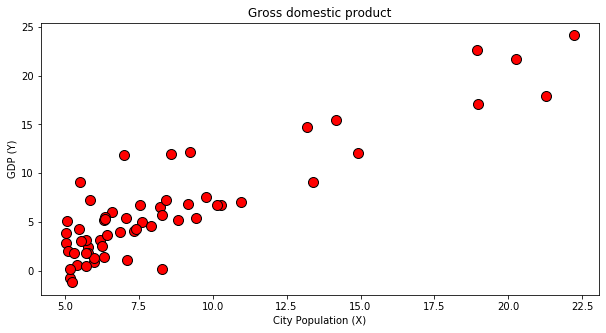

In [5]:
dataset_graph = GraphView(X, y)
dataset_graph.view_data(xlabel = 'City Population (X)', ylabel = 'GDP (Y)',
                        title = 'Gross domestic product')

In [6]:
regressor = LinearRegression(X, y)
optimize_values = regressor.train_linear_reg()
print('Cost Function:', optimize_values.fun)
print('Theta parameters:', optimize_values.x)

Cost Function: 3.260015447776126
Theta parameters: [-3.8905349   1.19798981]


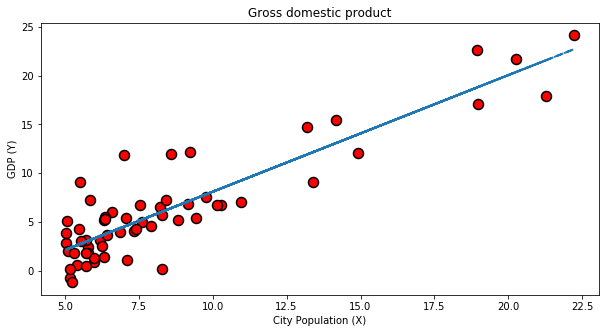

In [7]:
dataset_graph.model_linear(xlabel = 'City Population (X)', ylabel = 'GDP (Y)', 
                           title = 'Gross domestic product')

In [8]:
train_error, val_error = regressor.learning_curve(Xval, yval)
print('Training Examples\tTraining Error\t\tCross Validation Error')
for i in range(y.size):
    print('{}\t\t\t{}\t{}'.format(i+1, train_error[i], val_error[i]))

Training Examples	Training Error		Cross Validation Error
1			2.465190328815662e-32	20.02562408632705
2			7.54268185092396e-08	13.262449605662123
3			0.02222662575844963	11.164358412098732
4			0.6680620128669326	10.757187334394674
5			0.5422035552855697	10.493983940565016
6			0.46512406890182684	10.692686937368117
7			0.453835822091039	9.814718940557523
8			0.39774564387575295	9.84453043842644
9			0.43338240817175505	9.632645581990614
10			0.6642022227460824	9.193939557414588
11			1.788650721384469	8.67138164259105
12			1.882901632342285	8.810157514602286
13			2.8746115470768454	9.00511625712306
14			2.6785574045563045	8.958812755260833
15			2.6972983881914128	8.722371145835828
16			2.6098090223137334	8.76500243424036
17			2.499501309995355	8.668166231609588
18			2.5795241320343285	8.510788687894607
19			2.5080911126440406	8.596171472721574
20			3.9489173798401023	8.333326694505807
21			3.8005260231561877	8.322274388314105
22			3.6279385918913727	8.324117012216327
23			3.477912438707442

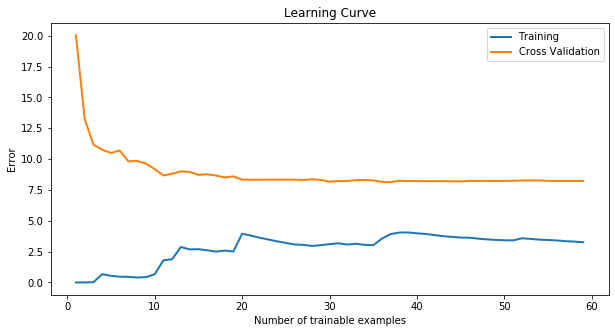

In [9]:
dataset_graph.learning_curve(train_error, val_error)

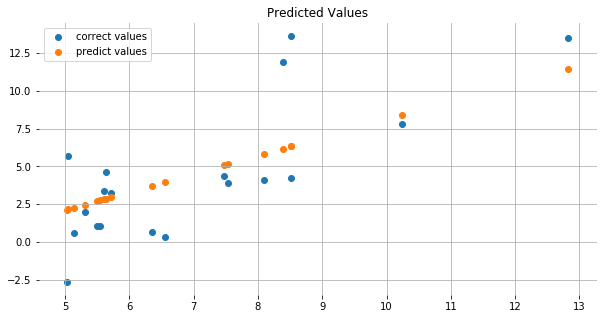

In [10]:
pred = regressor.predict(Xtest)
dataset_graph.predicted_values(Xtest, ytest, pred)

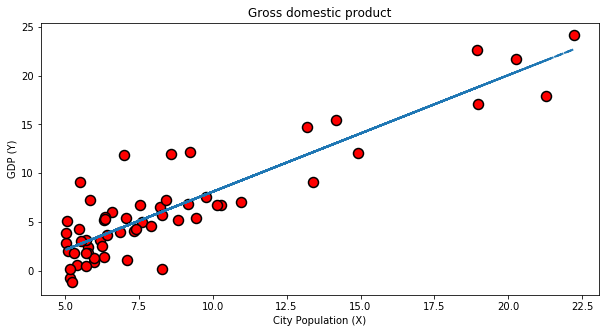

In [11]:
dataset_graph.model_linear_normal_equation(xlabel = 'City Population (X)', ylabel = 'GDP (Y)', 
                                           title = 'Gross domestic product')

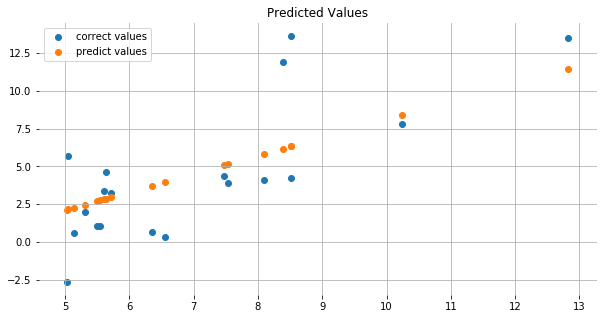

In [12]:
pred_NE = regressor.predict_normal_equation(Xtest)
dataset_graph.predicted_values(Xtest, ytest, pred_NE)